In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('job_descriptions.csv')

In [3]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [4]:
import re

In [5]:
# Function to extract the lower bound of experience
def extract_lower_bound(Experience):
    match = re.search(r'(\d+)', Experience)
    if match:
        return int(match.group(1))
    return None

In [6]:
# Function to extract the lower bound of salary range
def extract_salary_lower_bound(SalaryRange):
    match = re.search(r'(\d+)K', SalaryRange.replace(" − ", " - "))
    if match:
        return int(match.group(1)) * 1000
    return None

In [7]:
# Apply the extraction functions to create new columns for lower bounds
df['experience_lower'] = df['Experience'].apply(extract_lower_bound)
df['salary_lower'] = df['Salary Range'].apply(extract_salary_lower_bound)

In [22]:
# Temporarily filter only by a subset of conditions to debug
filtered_df = df[
    (df['Role'].str.contains('Data Scientist', case=False)) &
    (df['Country'].str[0].str.upper().isin(['A', 'B', 'C']) == False) &
    (df['latitude'] < 10)
]

In [23]:
filtered_df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,experience_lower,salary_lower
157,2149397187330318,5 to 8 Years,PhD,$58K-$128K,Suva,Fiji,-17.7134,178.0650,Intern,97779,...,Data Scientist,Idealist,Data Scientists use their expertise in data an...,"{'Transportation Benefits, Professional Develo...",Machine learning algorithms and libraries (e.g...,Apply machine learning algorithms and statisti...,AES,"{""Sector"":""Utilities"",""Industry"":""Utilities: G...",5,58000
2186,1066127075502329,3 to 15 Years,MCA,$56K-$95K,Paramaribo,Suriname,3.9193,-56.0278,Full-Time,124691,...,Data Scientist,Indeed,Data Scientists use their expertise in data an...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Machine learning algorithms and libraries (e.g...,Apply machine learning algorithms and statisti...,Aditya Birla Capital,"{""Sector"":""Financial Services"",""Industry"":""Fin...",3,56000
3112,878804934828965,5 to 8 Years,BBA,$62K-$117K,Tarawa,Kiribati,-3.3704,-168.7340,Full-Time,100094,...,Data Scientist,FlexJobs,Data Scientists use their expertise in data an...,"{'Employee Assistance Programs (EAP), Tuition ...",Machine learning algorithms and libraries (e.g...,Apply machine learning algorithms and statisti...,Citigroup,"{""Sector"":""Financial Services"",""Industry"":""Com...",5,62000
3943,262986327964605,4 to 14 Years,M.Com,$62K-$119K,Victoria,Seychelles,-4.6796,55.4920,Contract,44503,...,Data Scientist,Idealist,Data Scientists use their expertise in data an...,"{'Casual Dress Code, Social and Recreational A...",Machine learning algorithms and libraries (e.g...,Apply machine learning algorithms and statisti...,Andersons,"{""Sector"":""Agriculture"",""Industry"":""Food Produ...",4,62000
4537,514601171482002,2 to 12 Years,BBA,$61K-$125K,Addis Ababa,Ethiopia,9.1450,40.4897,Full-Time,27187,...,Data Scientist,LinkedIn,Data Scientists use their expertise in data an...,"{'Employee Assistance Programs (EAP), Tuition ...",Machine learning algorithms and libraries (e.g...,Apply machine learning algorithms and statisti...,DuPont,"{""Sector"":""Manufacturing"",""Industry"":""Chemical...",2,61000


In [24]:
filtered_df.shape

(1860, 25)

Filtered data contains 1860 records.
                Job Id     Experience Qualifications Salary Range  \
157   2149397187330318   5 to 8 Years            PhD   $58K-$128K   
2186  1066127075502329  3 to 15 Years            MCA    $56K-$95K   
3112   878804934828965   5 to 8 Years            BBA   $62K-$117K   
3943   262986327964605  4 to 14 Years          M.Com   $62K-$119K   
4537   514601171482002  2 to 12 Years            BBA   $61K-$125K   

         location     Country  latitude  longitude  Work Type  Company Size  \
157          Suva        Fiji  -17.7134   178.0650     Intern         97779   
2186   Paramaribo    Suriname    3.9193   -56.0278  Full-Time        124691   
3112       Tarawa    Kiribati   -3.3704  -168.7340  Full-Time        100094   
3943     Victoria  Seychelles   -4.6796    55.4920   Contract         44503   
4537  Addis Ababa    Ethiopia    9.1450    40.4897  Full-Time         27187   

      ...            Role Job Portal  \
157   ...  Data Scientist   Ideal

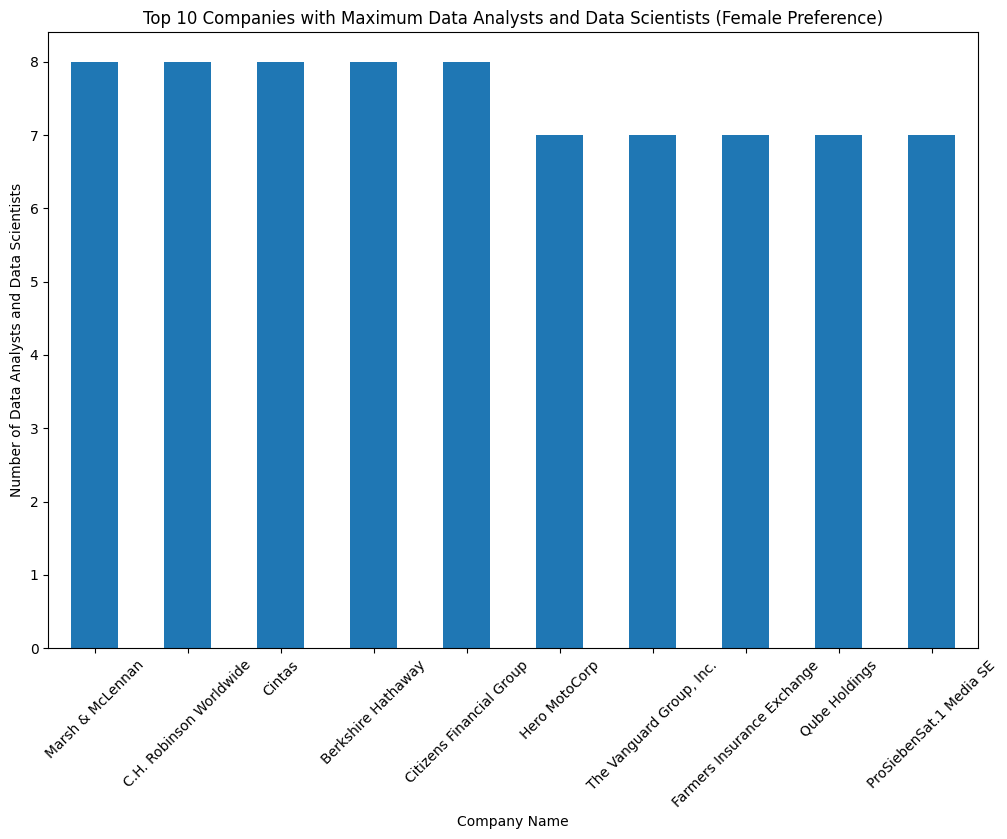

In [27]:
# Check if the filtered DataFrame is empty
if filtered_df.empty:
    print("No data available after applying the filters.")
else:
    print(f"Filtered data contains {len(filtered_df)} records.")
    
    # Print a sample of the filtered data
    print(filtered_df.head())

    # Group by company and count the number of occurrences
    company_counts = filtered_df['Company'].value_counts().nlargest(10)

    # Plotting
    plt.figure(figsize=(12, 8))
    company_counts.plot(kind='bar')
    plt.xlabel('Company Name')
    plt.ylabel('Number of Data Analysts and Data Scientists')
    plt.title('Top 10 Companies with Maximum Data Analysts and Data Scientists (Female Preference)')
    plt.xticks(rotation=45)
    plt.show()